In [20]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from sklearn import preprocessing

In [63]:
# Random generated data
# 1 means white text color
# 0 means black text color
df = pd.read_csv('colors.txt', sep = ',', header = None, index_col=None)
df.columns = ["r", "g", "b", "pred"]

minim = df.min()
maxim = df.max()

df = (df-df.min())/(df.max()-df.min())

# # normalize
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
print(df.head())

          r         g         b  pred
0  0.338583  0.708661  0.153543   0.0
1  0.074803  0.822835  0.870079   0.0
2  0.251969  0.346457  0.496063   1.0
3  0.118110  0.870079  0.586614   0.0
4  0.240157  0.185039  0.472441   1.0


In [64]:
# get training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(["pred"], axis=1)
y = df.drop(columns=['r', 'g', 'b'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
# define sigmoid and derivative of it
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

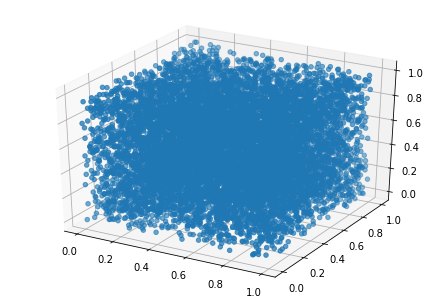

In [66]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df['r'], df['g'], df['b'])


In [67]:
learning_rate = 0.3

w1 = np.random.rand()
w2 = np.random.rand()
w3 = np.random.rand()
b = np.random.rand()

print(w1)

for i in range(10000):
    random_idx = np.random.randint(len(X_train))
    point = X_train.iloc[random_idx]
    
    # weighted cost
    z = w1 * point['r'] + point['g'] * w2 + point['b'] * w3 + b
    # activation function
    pred = sigmoid(z)
    # cost
    target = y_train.iloc[random_idx]
    cost = np.square(pred - target)

    # update params with derivatives
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    dz_dw1 = point['r']
    dz_dw2 = point['g']
    dz_dw3 = point['b']
    dz_b = 1
    
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_dw3 = dcost_pred * dpred_dz * dz_dw3
    dcost_b = dcost_pred * dpred_dz * dz_b
    
    w1 -= learning_rate * dcost_dw1
    w2 -= learning_rate * dcost_dw2
    w3 -= learning_rate * dcost_dw3
    b -= learning_rate * dcost_b
    

0.636681772657659


In [68]:
# verify and print model predictions
from sklearn.metrics import accuracy_score
y_pred = np.array([])

for i in range(len(X_test)):
    point = X_test.iloc[i]
#     print(point)
    z = point['r'] * w1 + point['g'] * w2 + point['b'] * w3 + b
    pred = sigmoid(z)
#     print(y_test.iloc[i])
#     print("Prediction: {}".format(pred))
    pred = 1 if (pred[0] > 0.5) else 0
    y_pred = np.append(y_pred, pred)

print(y_pred)
# print(y_test.T)
print(accuracy_score(y_test, y_pred))

[0. 0. 1. ... 1. 0. 0.]
0.9905


In [86]:
test_point = [233,235,238, 0]
for i in range(3):
    test_point[i] = (test_point[i]) / (254)
    
print(test_point)
z = test_point[0] * w1 + test_point[1] * w2 + test_point[2] * w3 + b
pred = sigmoid(z)

print(1 if pred[0] > 0.5 else 0)

[0.9173228346456693, 0.9251968503937008, 0.937007874015748, 0]
0
